# Decision Trees and Random Forest - Kyphosis Data

From a table of all possible combinations of inputs and their outputs, choose the features with the highest probability of getting one of the classes to start as root node. ( Most important features )

This way, the most important columns are on the top layer of the tree, and the least important (Not likely to split the data easily) are at the bottom of the tree.

Following the tree branches indicates different combinations for the inputs. If some input combinations dont occur, then it predicts either class randomly. If found, the class is output asper input

DTs are useful when the data has certain patterns. It doesnt work very well if the data is messy. Can handle unbalanced data, but wont work well if theres no discernable pattern

Build the Tree most important column onwards, If output is ambigious, use the next important column.

If we have an uncertain leaf, then we can set it to be the class with the highest probability 

If a tree classifies most of the leaves as the same type of class, then the Tree is called "Biased"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("kyphosis.csv")

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


Output is Kyphosis column

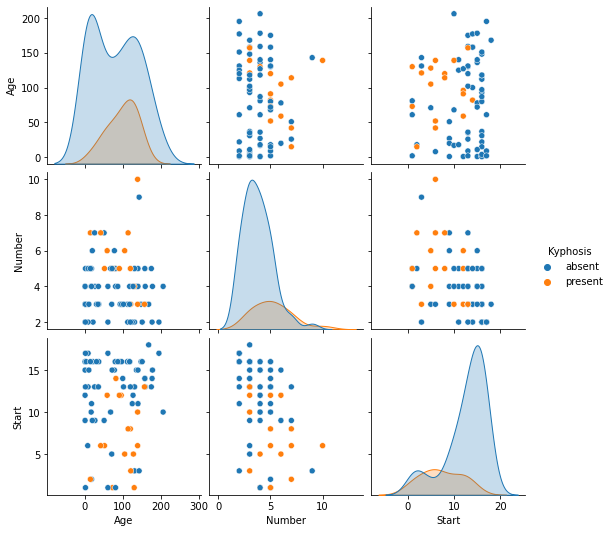

In [6]:
sns.pairplot(df,hue='Kyphosis')

Non-linearly separable!

In [7]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

Very few present values.     
For inbalanced data, dont look at accuracy. Prefer Recall,Precision, F1, AUCROC etc

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x=df.drop("Kyphosis",axis=1)
y=df['Kyphosis']

In [62]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30)

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
model=DecisionTreeClassifier()

In [65]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [66]:
preds=model.predict(xtest)

In [67]:
preds

array(['absent', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'present',
       'present', 'absent', 'present', 'absent', 'present', 'absent',
       'absent'], dtype=object)

In [68]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

In [69]:
print("Report:")
print(classification_report(ytest,preds))
print()
print("Confusion Matrix:")
print(confusion_matrix(ytest,preds))
print()
print("Accuracy: ")
print(model.score(xtest,ytest))
#print("AUC ROC:")
#print(roc_auc_score(ytest,preds))

Report:
              precision    recall  f1-score   support

      absent       0.95      0.86      0.90        21
     present       0.50      0.75      0.60         4

    accuracy                           0.84        25
   macro avg       0.72      0.80      0.75        25
weighted avg       0.88      0.84      0.85        25


Confusion Matrix:
[[18  3]
 [ 1  3]]

Accuracy: 
0.84


## Random Forest Time!

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
model=RandomForestClassifier(n_estimators=200)

In [82]:
model.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=200)

In [83]:
preds=model.predict(xtest)

In [84]:
preds

array(['absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent'], dtype=object)

In [85]:
print("Report:")
print(classification_report(ytest,preds))
print()
print("Confusion Matrix:")
print(confusion_matrix(ytest,preds))
print()
print("Accuracy: ")
print(model.score(xtest,ytest))
#print("AUC ROC:")
#print(roc_auc_score(ytest,preds))

Report:
              precision    recall  f1-score   support

      absent       0.91      0.95      0.93        21
     present       0.67      0.50      0.57         4

    accuracy                           0.88        25
   macro avg       0.79      0.73      0.75        25
weighted avg       0.87      0.88      0.87        25


Confusion Matrix:
[[20  1]
 [ 2  2]]

Accuracy: 
0.88


Depends alot on the shuffling of your data as well!